# Complements on the Effect of $N_l$, Boundary Conditions, Dataset, $\epsilon$

This notebook looks at the influence of four factors:

* the width $N_l$
* the boundary conditions used in convolutional layers
* the input dataset
* the fuzz factor $\epsilon$ of batch normalization

At times, the number of realizations is reduced to `num_realizations = 200`. This has the effect of making the curves slightly more noisy, but it is already enough to gain insights.

## Influence of the Width $N_l$



In this experiment, parameters are set as in Fig. $2$ except for `num_channels = 512`. 

The behaviour is absolutely equivalent to Fig. $2$ apart from the diffusion of $\log \nu_2(\mathbf{x}^l)$, $\log \mu_2(\mathrm{d}\mathbf{x}^l)$ being slowed down by a factor ≈ 4.

In [ ]:
from run_experiment import run_experiment
from manage_experiments import prune_experiment

# this experiment ran in the cloud, but it is left here to show the function call
run_experiment(architecture='vanilla', total_depth=200, kernel_size=3, num_channels=512, 
               boundary='periodic', dataset='cifar10',
               batch_size=1024, num_realizations=10000, name_experiment='vanilla_histo_512', 
               num_computations=4, compute_reff_signal=False, compute_reff_noise=False, verbose=True)

# in the npy/ folder, only the moments relevant for the plots are kept in order to limit disk space
prune_experiment(type_plot='vanilla_histo', name_experiment='vanilla_histo_512')

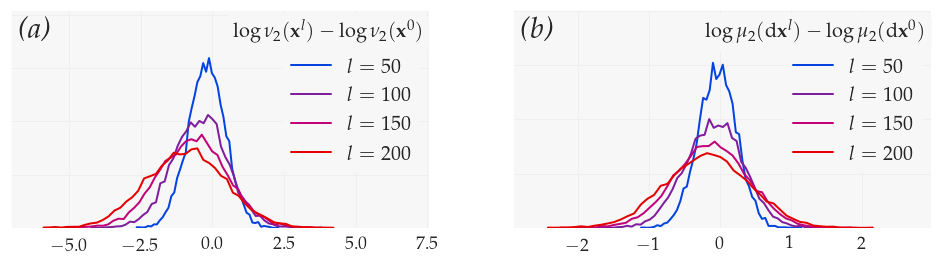

In [1]:
from manage_experiments import load_experiment
from plots import plot_vanilla_histo
%matplotlib inline

moments_vanilla_histo = load_experiment('vanilla_histo_512')
    # restart kernel and set use_tex=False, if no latex distribution is found
plot_vanilla_histo(moments_vanilla_histo, use_tex=True, name_fig=None)

When changing the width $N_l$ while keeping $N_l \gg 1$, the evolution of vanilla nets, batch-normalized feedforward nets and batch-normalized resnets is found equivalent to Fig. $3$, $4$, $5$ with mostly changes in $1\sigma$ intervals.

## Influence of Boundary Conditions for Vanilla Nets

In these experiments, parameters are set as in Fig. $3$ except for `boundary = 'symmetric'`  and `boundary = 'zero_padding'`:

* with `boundary = 'symmetric'`, there is a fully equivalent behaviour to Fig. $3$ with $\delta \chi^l \to 1$ and the convergence to the pathology of one-dimension signal:  $r_\text{eff}(\mathbf{x}^l) \to 1$;

* with `boundary = 'zero_padding'`, there is an equivalent behaviour of $\chi^l$ with  $\delta \chi^l \to 1$. However, the effective rank $r_\text{eff}(\mathbf{x}^l)$ does not converge to $1$ but rather to ≈ $2$. With periodic or symmetric boundary conditions, the signal becomes homogeneous with respect to $\alpha$ such that receptive fields become one-dimensional. This mechanism however is hindered by zero-padding with semi-padded receptive fields creating new directions of variance in $r_\text{eff}(\mathbf{x}^l)$.

In [ ]:
from run_experiment import run_experiment
from manage_experiments import prune_experiment

# these experiments ran in the cloud, but they are left here to show the function calls
run_experiment(architecture='vanilla', total_depth=200, kernel_size=3, num_channels=512, 
               boundary='symmetric', dataset='cifar10',
               batch_size=64, num_realizations=200, name_experiment='vanilla_symmetric', 
               compute_reff_signal=True, compute_reff_noise=False, verbose=True)

run_experiment(architecture='vanilla', total_depth=200, kernel_size=3, num_channels=512, 
               boundary='zero_padding', dataset='cifar10',
               batch_size=64, num_realizations=200, name_experiment='vanilla_zero_padding', 
               compute_reff_signal=True, compute_reff_noise=False, verbose=True)

# in the npy/ folder, only the moments relevant for the plots are kept in order to limit disk space
prune_experiment(type_plot='vanilla', name_experiment='vanilla_symmetric')
prune_experiment(type_plot='vanilla', name_experiment='vanilla_zero_padding')

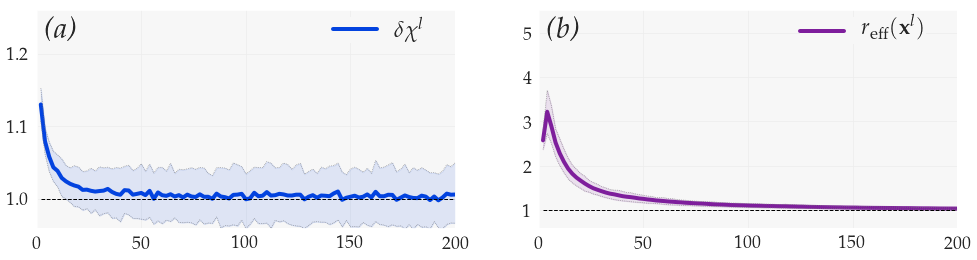

In [1]:
from manage_experiments import load_experiment
from plots import plot_vanilla
%matplotlib inline

moments_vanilla = load_experiment('vanilla_symmetric')
plot_vanilla(moments_vanilla, use_tex=True, name_fig=None)

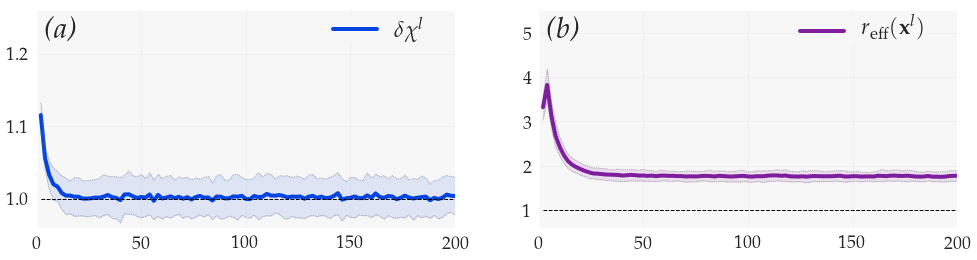

In [2]:
from manage_experiments import load_experiment
from plots import plot_vanilla
%matplotlib inline

moments_vanilla = load_experiment('vanilla_zero_padding')
plot_vanilla(moments_vanilla, use_tex=True, name_fig=None)

*In the remaining experiments, only batch-normalized feedforward nets are considered since the evolution of batch-normalized resnets is the logarithmic version of the evolution of batch-normalized feedforward nets.*

## Influence of Boundary Conditions for Batch-Normalized Feedforward Nets

In this experiment, parameters are set as in Fig. $4$ except for `boundary = 'zero_padding'`. In this case, zero-padding leads to an evolution fully equivalent to Fig. $4$.

In [ ]:
from run_experiment import run_experiment
from manage_experiments import prune_experiment

# this experiment ran in the cloud, but it is left here to show the function call
run_experiment(architecture='bn_ff', total_depth=200, kernel_size=3, num_channels=512, 
               boundary='zero_padding', dataset='cifar10',
               batch_size=64, num_realizations=200, name_experiment='bn_ff_zero_padding', 
               compute_reff_signal=True, compute_reff_noise=True, verbose=True)

# in the npy/ folder, only the moments relevant for the plots are kept in order to limit disk space
prune_experiment(type_plot='bn_ff', name_experiment='bn_ff_zero_padding')

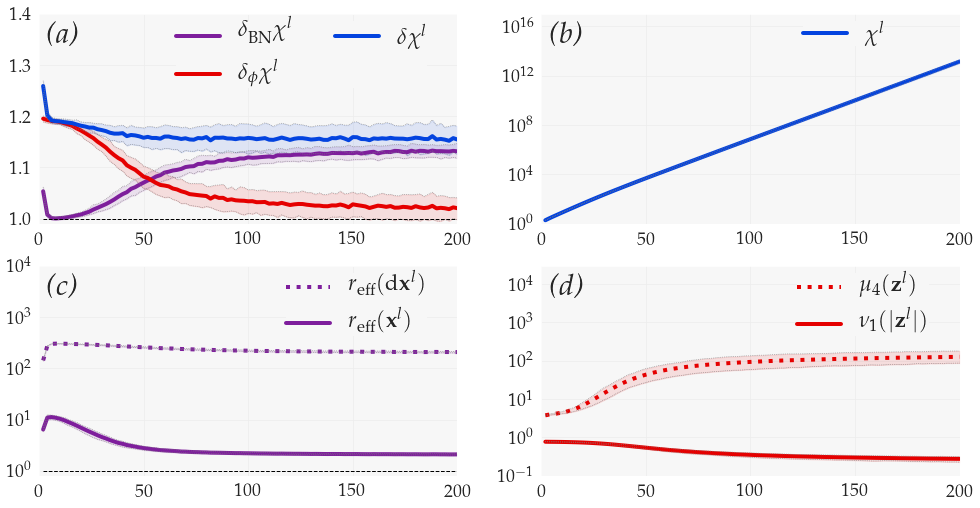

In [1]:
from manage_experiments import load_experiment
from plots import plot_bn_ff
%matplotlib inline

moments_bn_ff = load_experiment('bn_ff_zero_padding')
plot_bn_ff(moments_bn_ff, use_tex=True, name_fig=None)

## Influence of Input Dataset

In this experiment, parameters are set as in Fig. $4$ except for `dataset = 'mnist'`. 

There is a slightly different behaviour at very low depth, with higher $\mu_4(\mathbf{z}^l)$ and lower $\delta_\phi \chi^l$. This is presumably due to the fact that `mnist` is more fat-tailed than `cifar-10`.

The evolution becomes equivalent to Fig. $4$ at higher depth.

In [ ]:
from run_experiment import run_experiment
from manage_experiments import prune_experiment

# this experiment ran in the cloud, but it is left here to show the function call
run_experiment(architecture='bn_ff', total_depth=200, kernel_size=3, num_channels=512, 
               boundary='periodic', dataset='mnist',
               batch_size=64, num_realizations=200, name_experiment='bn_ff_mnist', 
               compute_reff_signal=True, compute_reff_noise=True, verbose=True)

# in the npy/ folder, only the moments relevant for the plots are kept in order to limit disk space
prune_experiment(type_plot='bn_ff', name_experiment='bn_ff_mnist')

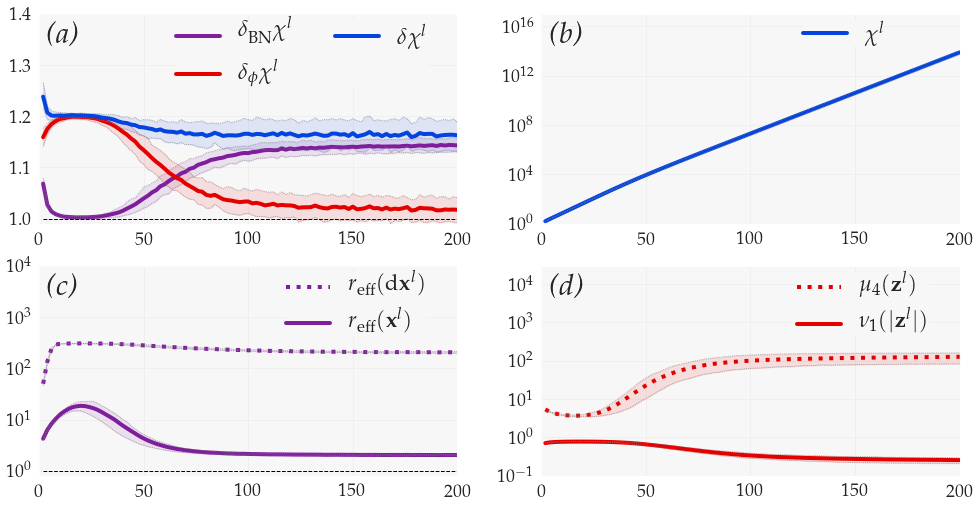

In [1]:
from manage_experiments import load_experiment
from plots import plot_bn_ff
%matplotlib inline

moments_bn_ff = load_experiment('bn_ff_mnist')
plot_bn_ff(moments_bn_ff, use_tex=True, name_fig=None)

## Influence of $\epsilon$

In this experiment, parameters are set as in Fig. $4$ except for `epsilon = 0` rather than `epsilon = 0.001`. The evolution is undistinguishable from Fig. $4$, meaning that $\epsilon$ has negligible impact as long as it is small.

In [ ]:
from run_experiment import run_experiment
from manage_experiments import prune_experiment

# this experiment ran in the cloud, but it is left here to show the function call
run_experiment(architecture='bn_ff', total_depth=200, kernel_size=3, num_channels=512, 
               boundary='periodic', dataset='cifar10', epsilon=0.,
               batch_size=64, num_realizations=200, name_experiment='bn_ff_epsilon', 
               compute_reff_signal=True, compute_reff_noise=True, verbose=True)

# in the npy/ folder, only the moments relevant for the plots are kept in order to limit disk space
prune_experiment(type_plot='bn_ff', name_experiment='bn_ff_epsilon')

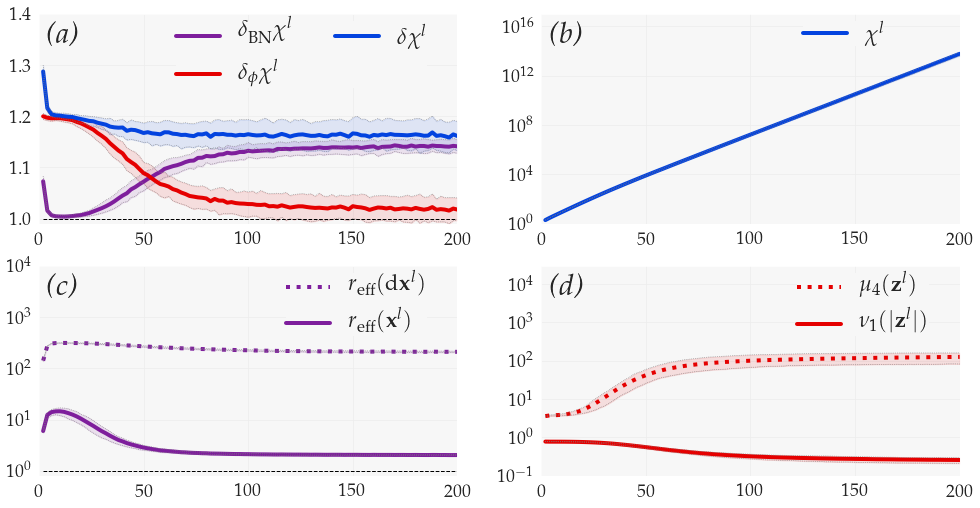

In [1]:
from manage_experiments import load_experiment
from plots import plot_bn_ff
%matplotlib inline

moments_bn_ff = load_experiment('bn_ff_epsilon')
plot_bn_ff(moments_bn_ff, use_tex=True, name_fig=None)